In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:

Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')
Train_data = Train[['sell_price']].dropna()
Test_data = Test[['sell_price']].dropna()


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_Train_data = scaler.fit_transform(Train_data)
scaled_Test_data = scaler.transform(Test_data)

In [6]:
def create_sequences(data, sequence_length): #create function of sequences
    sequences = []
    targets = []
    for i in range(len(data)- sequence_length):
        sequences.append(data[i:i +sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 20 #parameters

X_Train,y_Train = create_sequences(scaled_Train_data,sequence_length) #sequence for Train data
X_Test,y_Test = create_sequences(scaled_Test_data,sequence_length) # sequencec for Test data
print(f'Training data shape: {X_Train.shape}, {y_Train.shape}')
print(f'Testing data shape: {X_Test.shape}, {y_Test.shape}')




Training data shape: (4749, 20, 1), (4749, 1)
Testing data shape: (532, 20, 1), (532, 1)


# LSTM Model Building

In [7]:
y_train = y_Train.reshape(-1, 1)
y_test = y_Test.reshape(-1, 1)

In [8]:
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(layer=Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\MTariq\Downloads\python-binance-master\Desktop\python-binance-master\tests\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
history = model.fit(X_Train,y_Train,epochs=200,validation_split=0.2,callbacks=[early_stop],verbose=1)


Epoch 1/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0376 - val_loss: 4.1932e-04
Epoch 2/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 9.4091e-04 - val_loss: 2.0783e-04
Epoch 3/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.6450e-04 - val_loss: 3.8350e-04
Epoch 4/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.8817e-04 - val_loss: 7.1835e-04
Epoch 5/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.4132e-04 - val_loss: 1.5773e-04
Epoch 6/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.4402e-04 - val_loss: 1.9586e-04
Epoch 7/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.5602e-04 - val_loss: 2.4112e-04
Epoch 8/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.9544e-04 - val_loss: 1.9517e-04
Epoch 9/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.2331e-04 - val_loss: 1.3932e-04
Epoch 10/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5777e-04 - val_loss: 1.3198e-04
Epoch 11/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
y_pred = model.predict(X_Test)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [11]:
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

In [12]:
print(f'y_test shape: {y_test.shape}, y_pred shape: {y_pred.shape}')

y_test shape: (532, 1), y_pred shape: (532, 1)


In [13]:
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {test_mse}, Test R2: {test_r2}')


Test MSE: 3761017.3620430646, Test R2: 0.9508146166731951


# Visulized LSTM Result

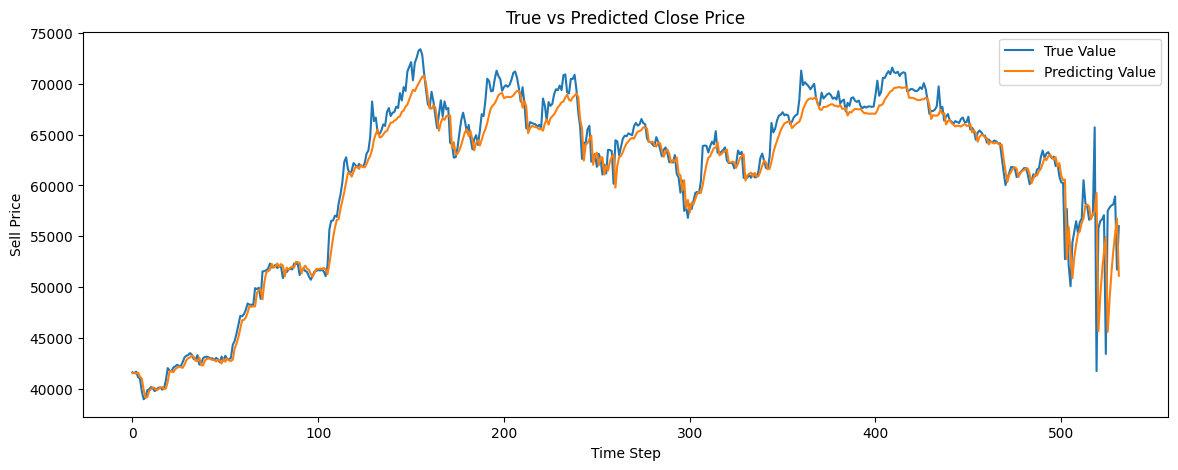

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicting Value')
plt.title('True vs Predicted Close Price')
plt.xlabel('Time Step')
plt.ylabel('Sell Price')
plt.legend()
plt.show()

In [15]:
actual_signals = Test_data['sell_price'].values[sequence_length:]
predicted_signals = y_pred.flatten()
LSTM_signals = np.where(actual_signals > predicted_signals, 1, -1)
print("LSTM Signals:")
print(LSTM_signals)

LSTM Signals:
[ 1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1
  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1
 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 

In [16]:
import numpy as np
import pandas as pd
df_generated_signals = pd.DataFrame(LSTM_signals, columns=['LSTM_Signals'])
df_generated_signals.to_csv('LSTM_signals.csv', index=False)

In [17]:
model.save_weights('lstmw.weights.h5')